In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Import data set

In [2]:
df1 = pd.read_csv('/Users/joeyposillico/Desktop/project 4/CC GENERAL.csv')
df1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#getting an idea of the data
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
#checking the dtypes for each column
df1.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
#checking the sze of the df
df1.shape

(8950, 18)

## Cleaning data

In [6]:
#checking for null values  
df1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
#descibe the minimum payments field
df1['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [8]:
#filling the null values in the minimum payments field with the mean
df1['MINIMUM_PAYMENTS'].fillna(df1['MINIMUM_PAYMENTS'].mean(), inplace=True)
#rechecking for null values
df1.isnull().sum()

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_69136/1944238070.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['MINIMUM_PAYMENTS'].fillna(df1['MINIMUM_PAYMENTS'].mean(), inplace=True)


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
#doing the same for the credit limit field since there is only 1 missing value
df1['CREDIT_LIMIT'].fillna(df1['CREDIT_LIMIT'].mean(), inplace=True)
df1.isnull().sum()

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_69136/64310709.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['CREDIT_LIMIT'].fillna(df1['CREDIT_LIMIT'].mean(), inplace=True)


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- null values have now been dealt with. Done by filling the NA spaces with the mean values of their column

In [10]:
#all columns except the first customer id column
df2 = df1.drop('CUST_ID', axis=1)

In [11]:
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Cleaning Data

#### Dealing with outliers

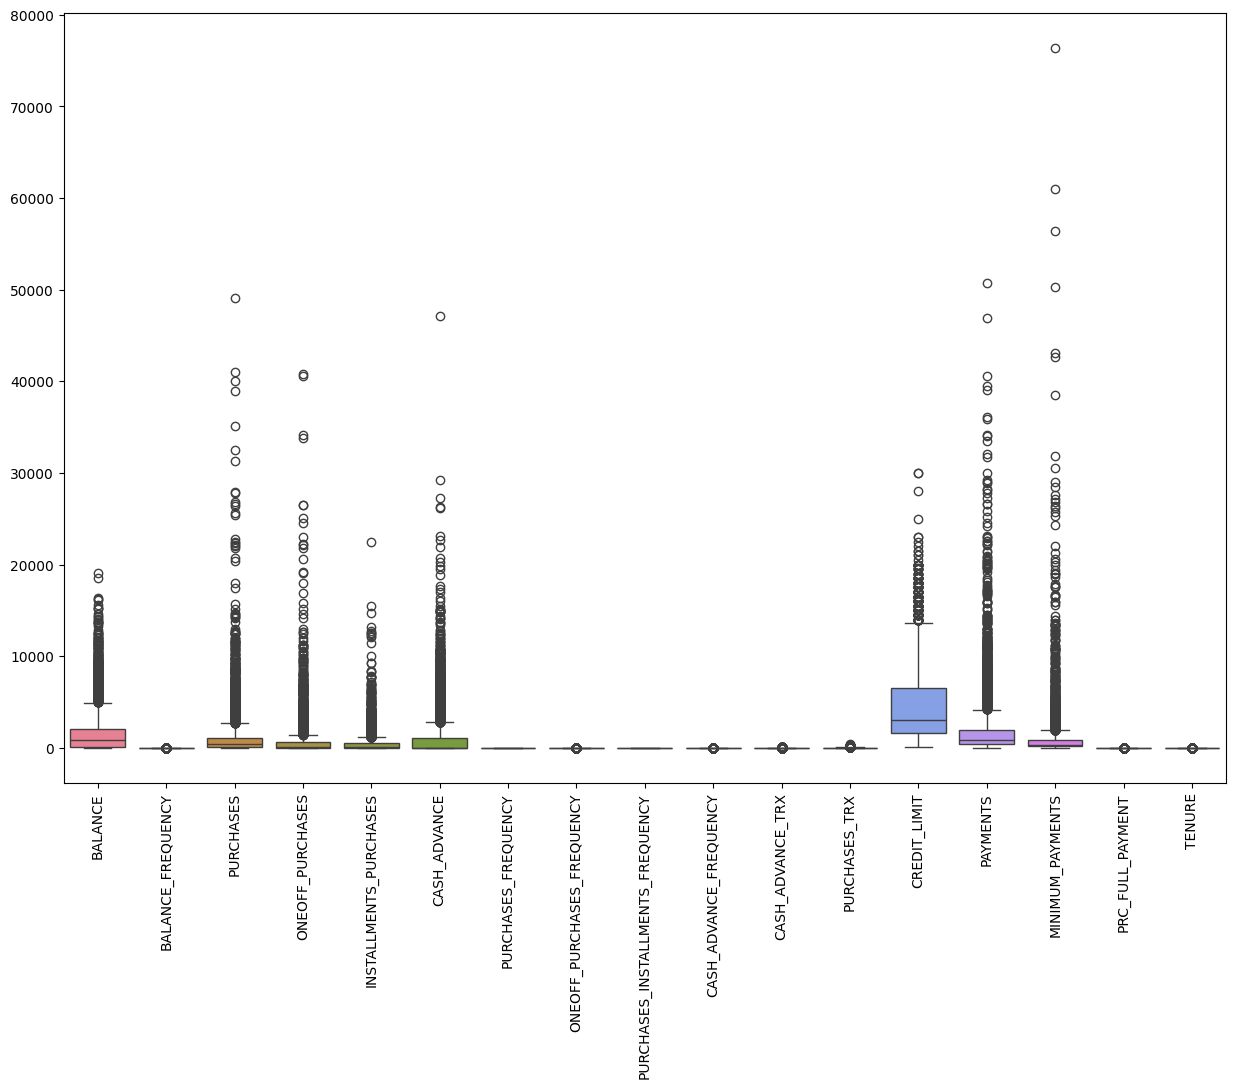

In [12]:
# Boxplot for each column to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.show()


- visualizing each column to determine the extent of the outliers

In [13]:
# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df2)

# Filter out rows with Z-scores greater than 3 or less than -3
df_no_outliers = df2[(np.abs(z_scores) < 3).all(axis=1)]

- using z scores in order to determine which outliers should be dropped, using 3 as the limit to decide which are dropped and which arent.

In [14]:
print(df2.shape)
print(df_no_outliers.shape)

(8950, 17)
(7434, 17)


- comparing shapes to see the amount of data dropped.

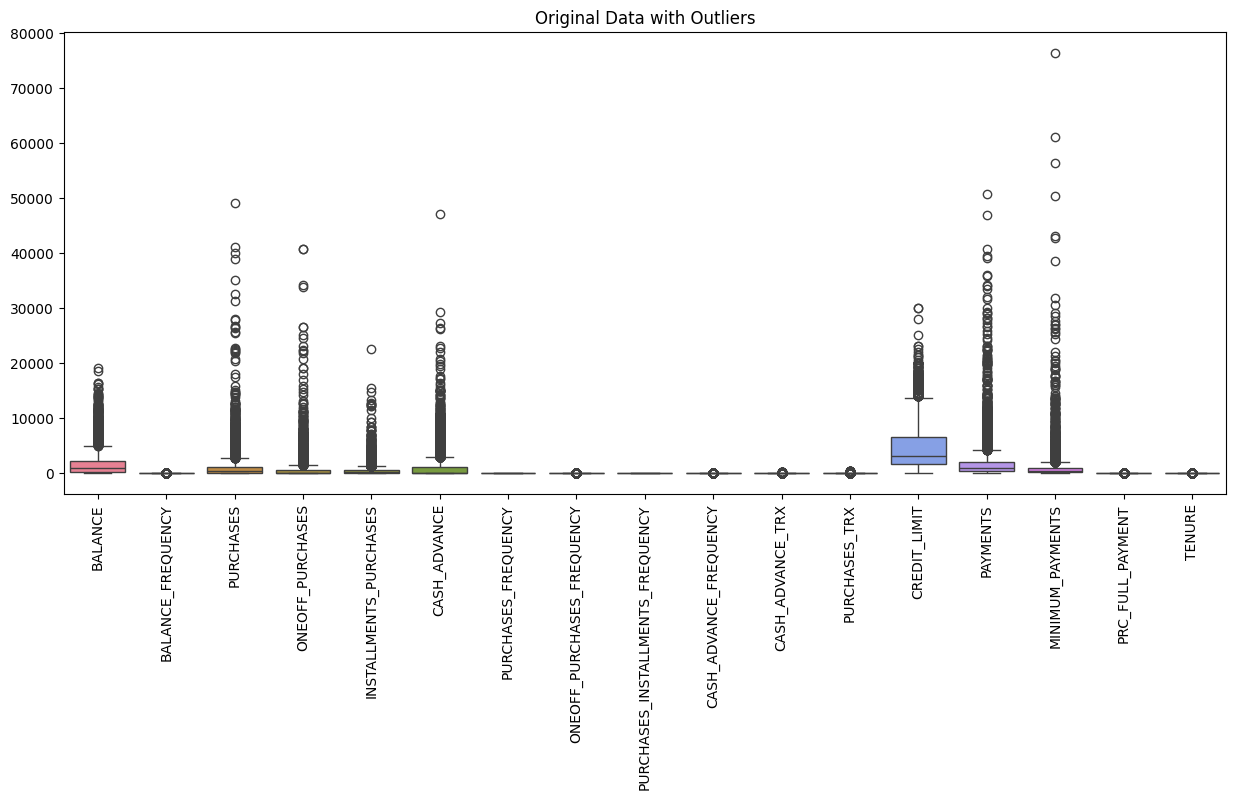

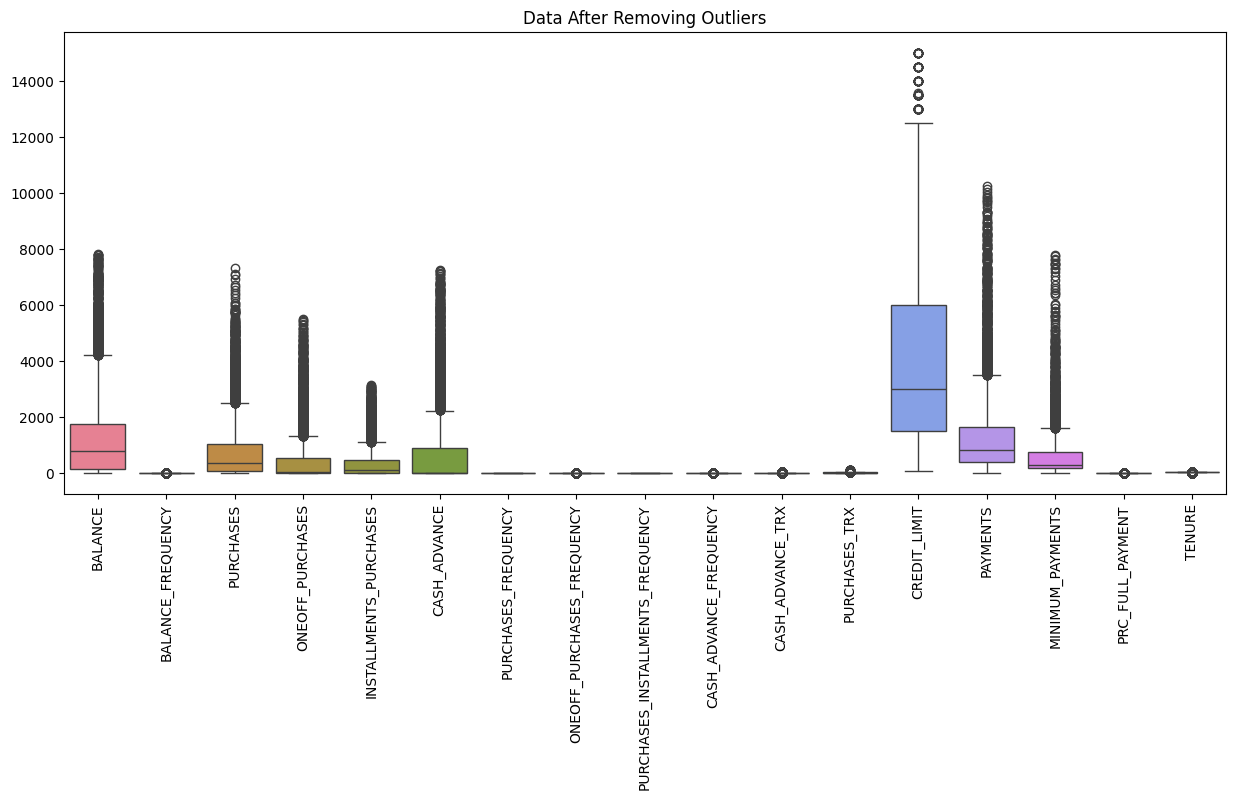

In [15]:
# Boxplot for the original data
plt.figure(figsize=(15, 6))
sns.boxplot(data=df2)
plt.title("Original Data with Outliers")
plt.xticks(rotation=90)
plt.show()

# Boxplot for the data without outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_no_outliers.select_dtypes(include=[np.number]))
plt.title("Data After Removing Outliers")
plt.xticks(rotation=90)
plt.show()


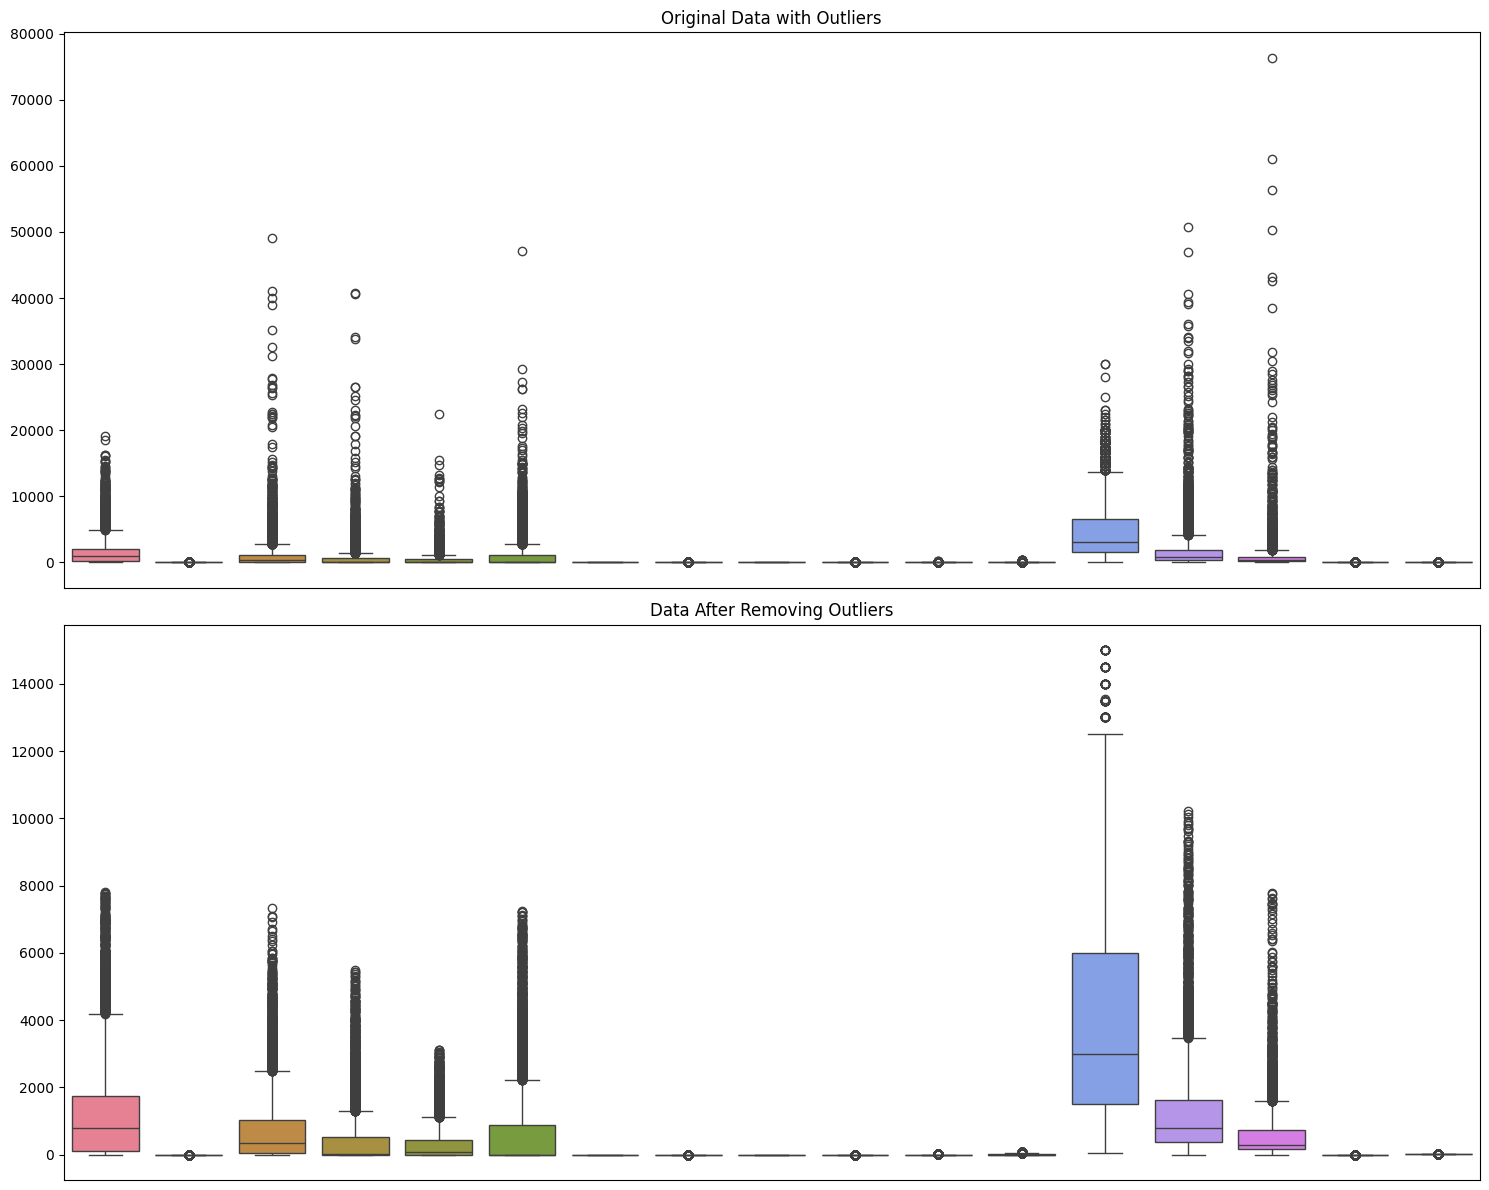

In [16]:
plt.figure(figsize=(15, 12))

# boxplot for the original data (first row)
plt.subplot(2, 1, 1)
sns.boxplot(data=df2)
plt.title("Original Data with Outliers")
plt.xticks([])  # Remove x-axis labels

# boxplot for the data without outliers (second row)
plt.subplot(2, 1, 2)
sns.boxplot(data=df_no_outliers.select_dtypes(include=[np.number]))
plt.title("Data After Removing Outliers")
plt.xticks([])  # Remove x-axis labels

# Show the plot
plt.tight_layout()
plt.show()


- Although some outliers are still clearly present, the large outliers have been dealt with which makes the data better to work with. 

### Dealing with distribution of data 

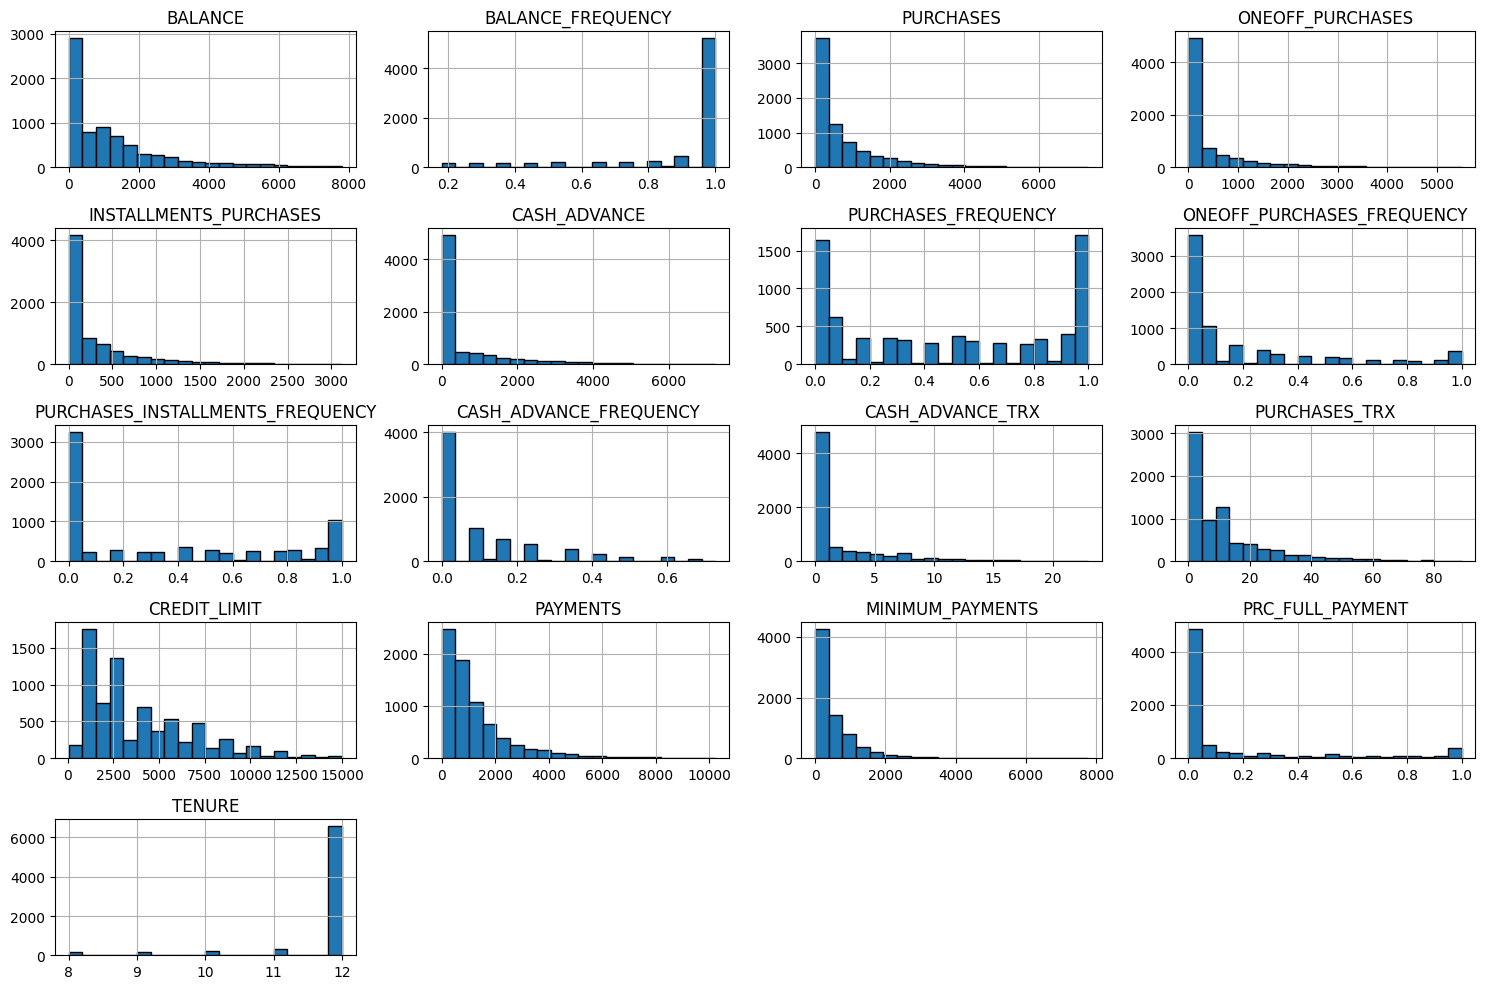

In [17]:
df_no_outliers.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [18]:
df_no_outliers.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### Checking Distribution

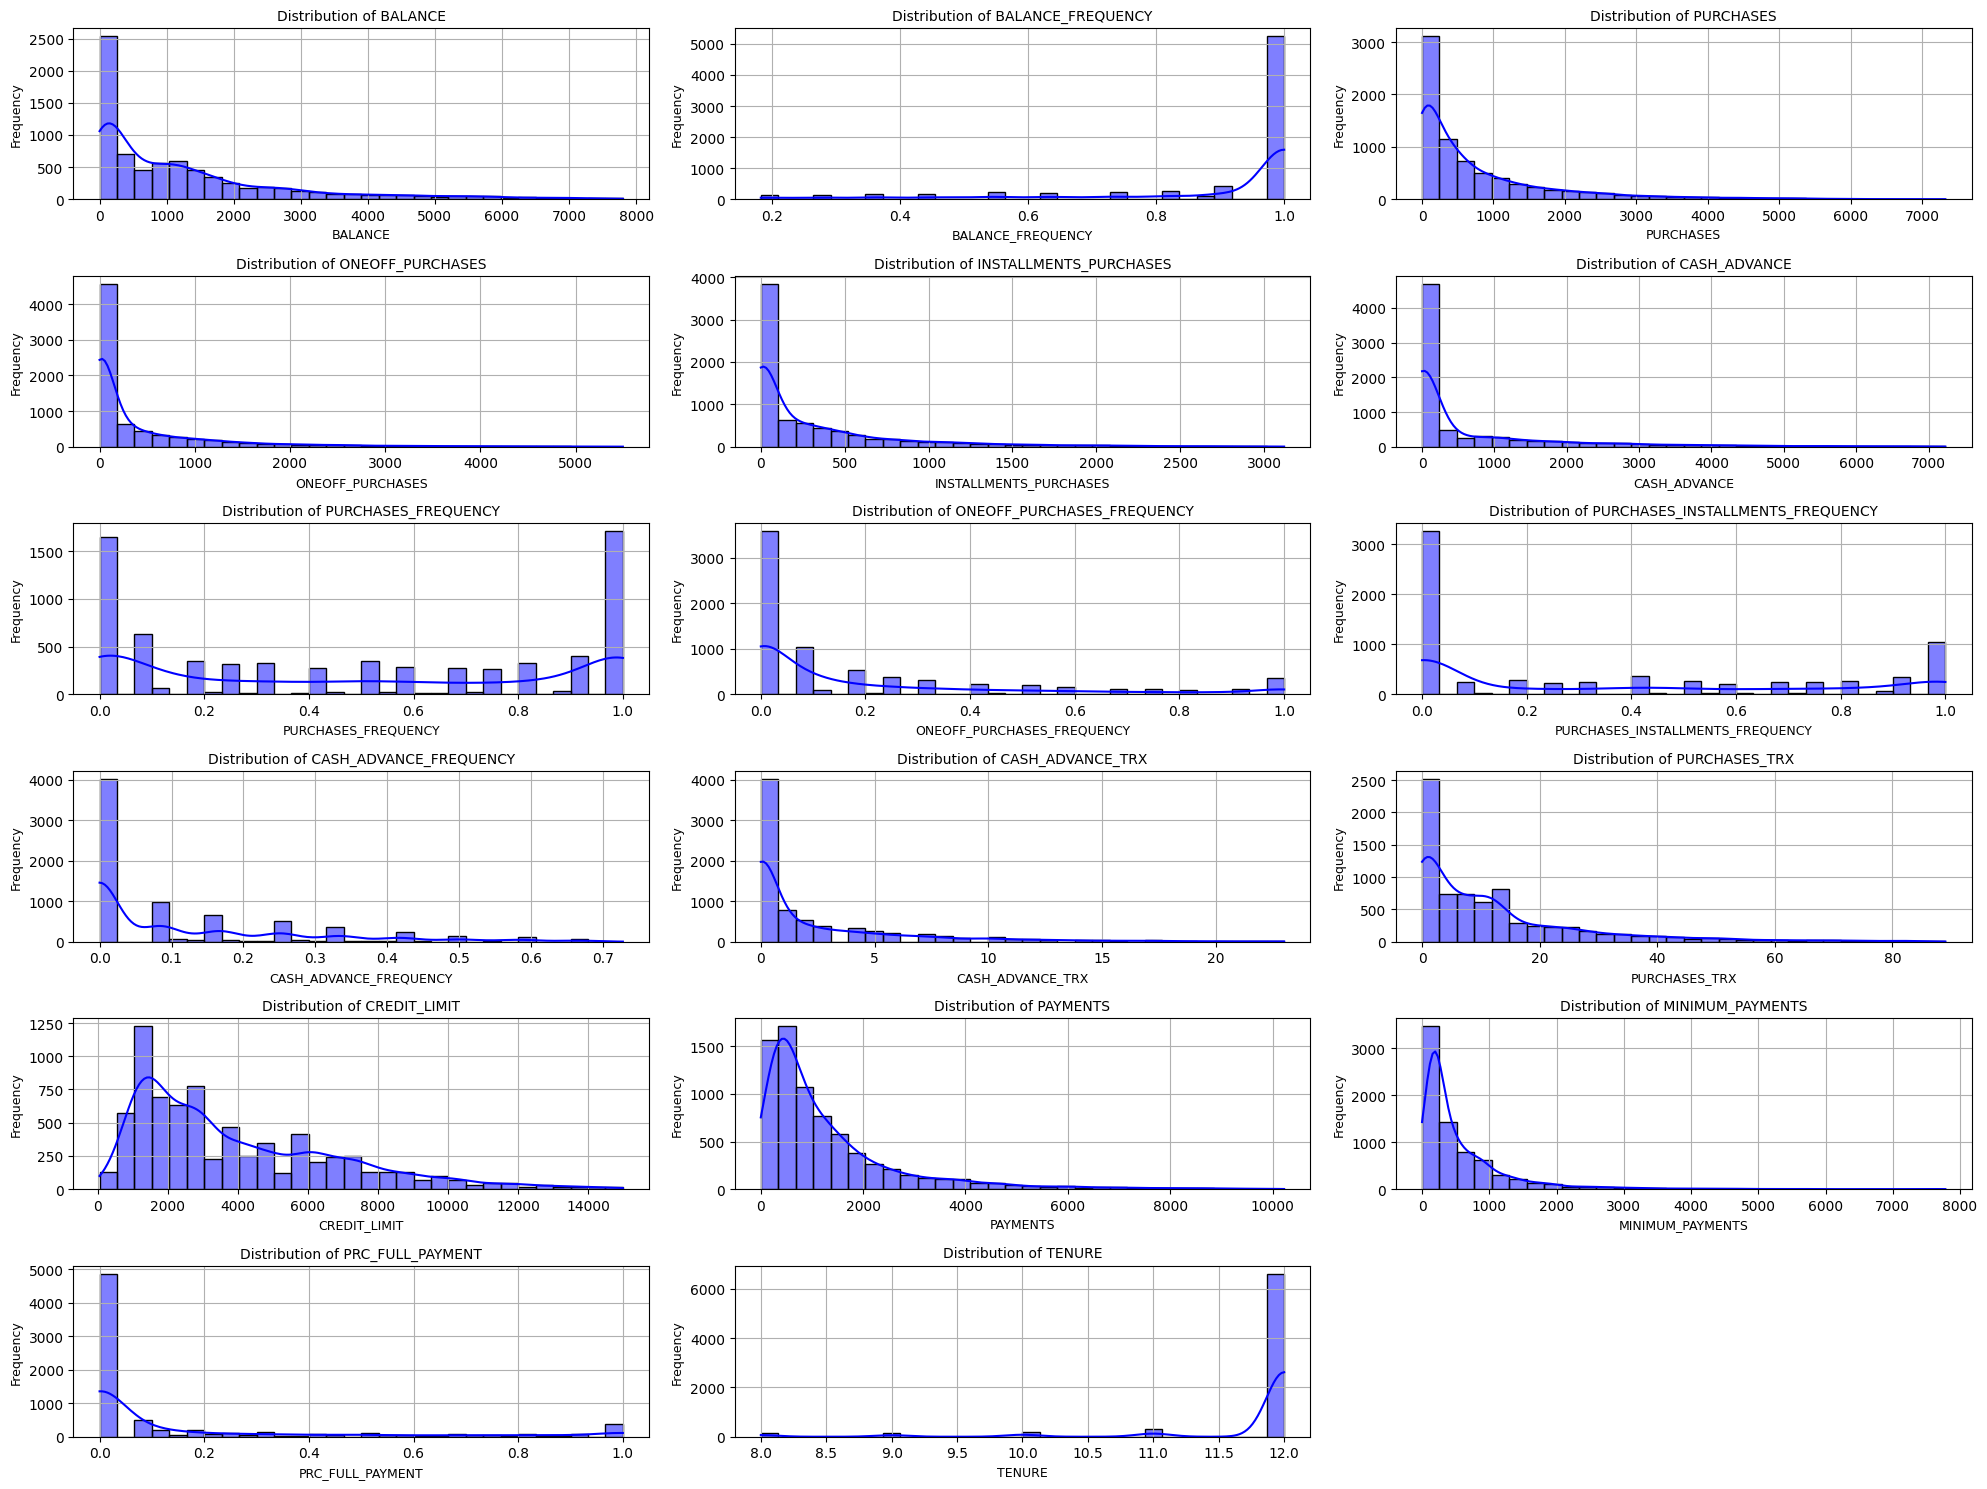

In [19]:


plt.figure(figsize=(20, 15))
predictor_vars = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                  'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                  'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                  'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                  'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
                  'TENURE']

# Define rows and columns for the layout
rows = 6
cols = 3

# Create a subplot for each predictor variable
for i, var in enumerate(predictor_vars, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_no_outliers[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {var}', fontsize=10)
    plt.xlabel(var, fontsize=9)
    plt.ylabel('Frequency', fontsize=9)
    plt.grid(True)

plt.tight_layout()
plt.show()


- BALANCE, PURCHASES, ONEOFF_PURCHASES, ISTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM PAYMENTS all are skewed right with long tails the left
- This will be addressed via log transformation 

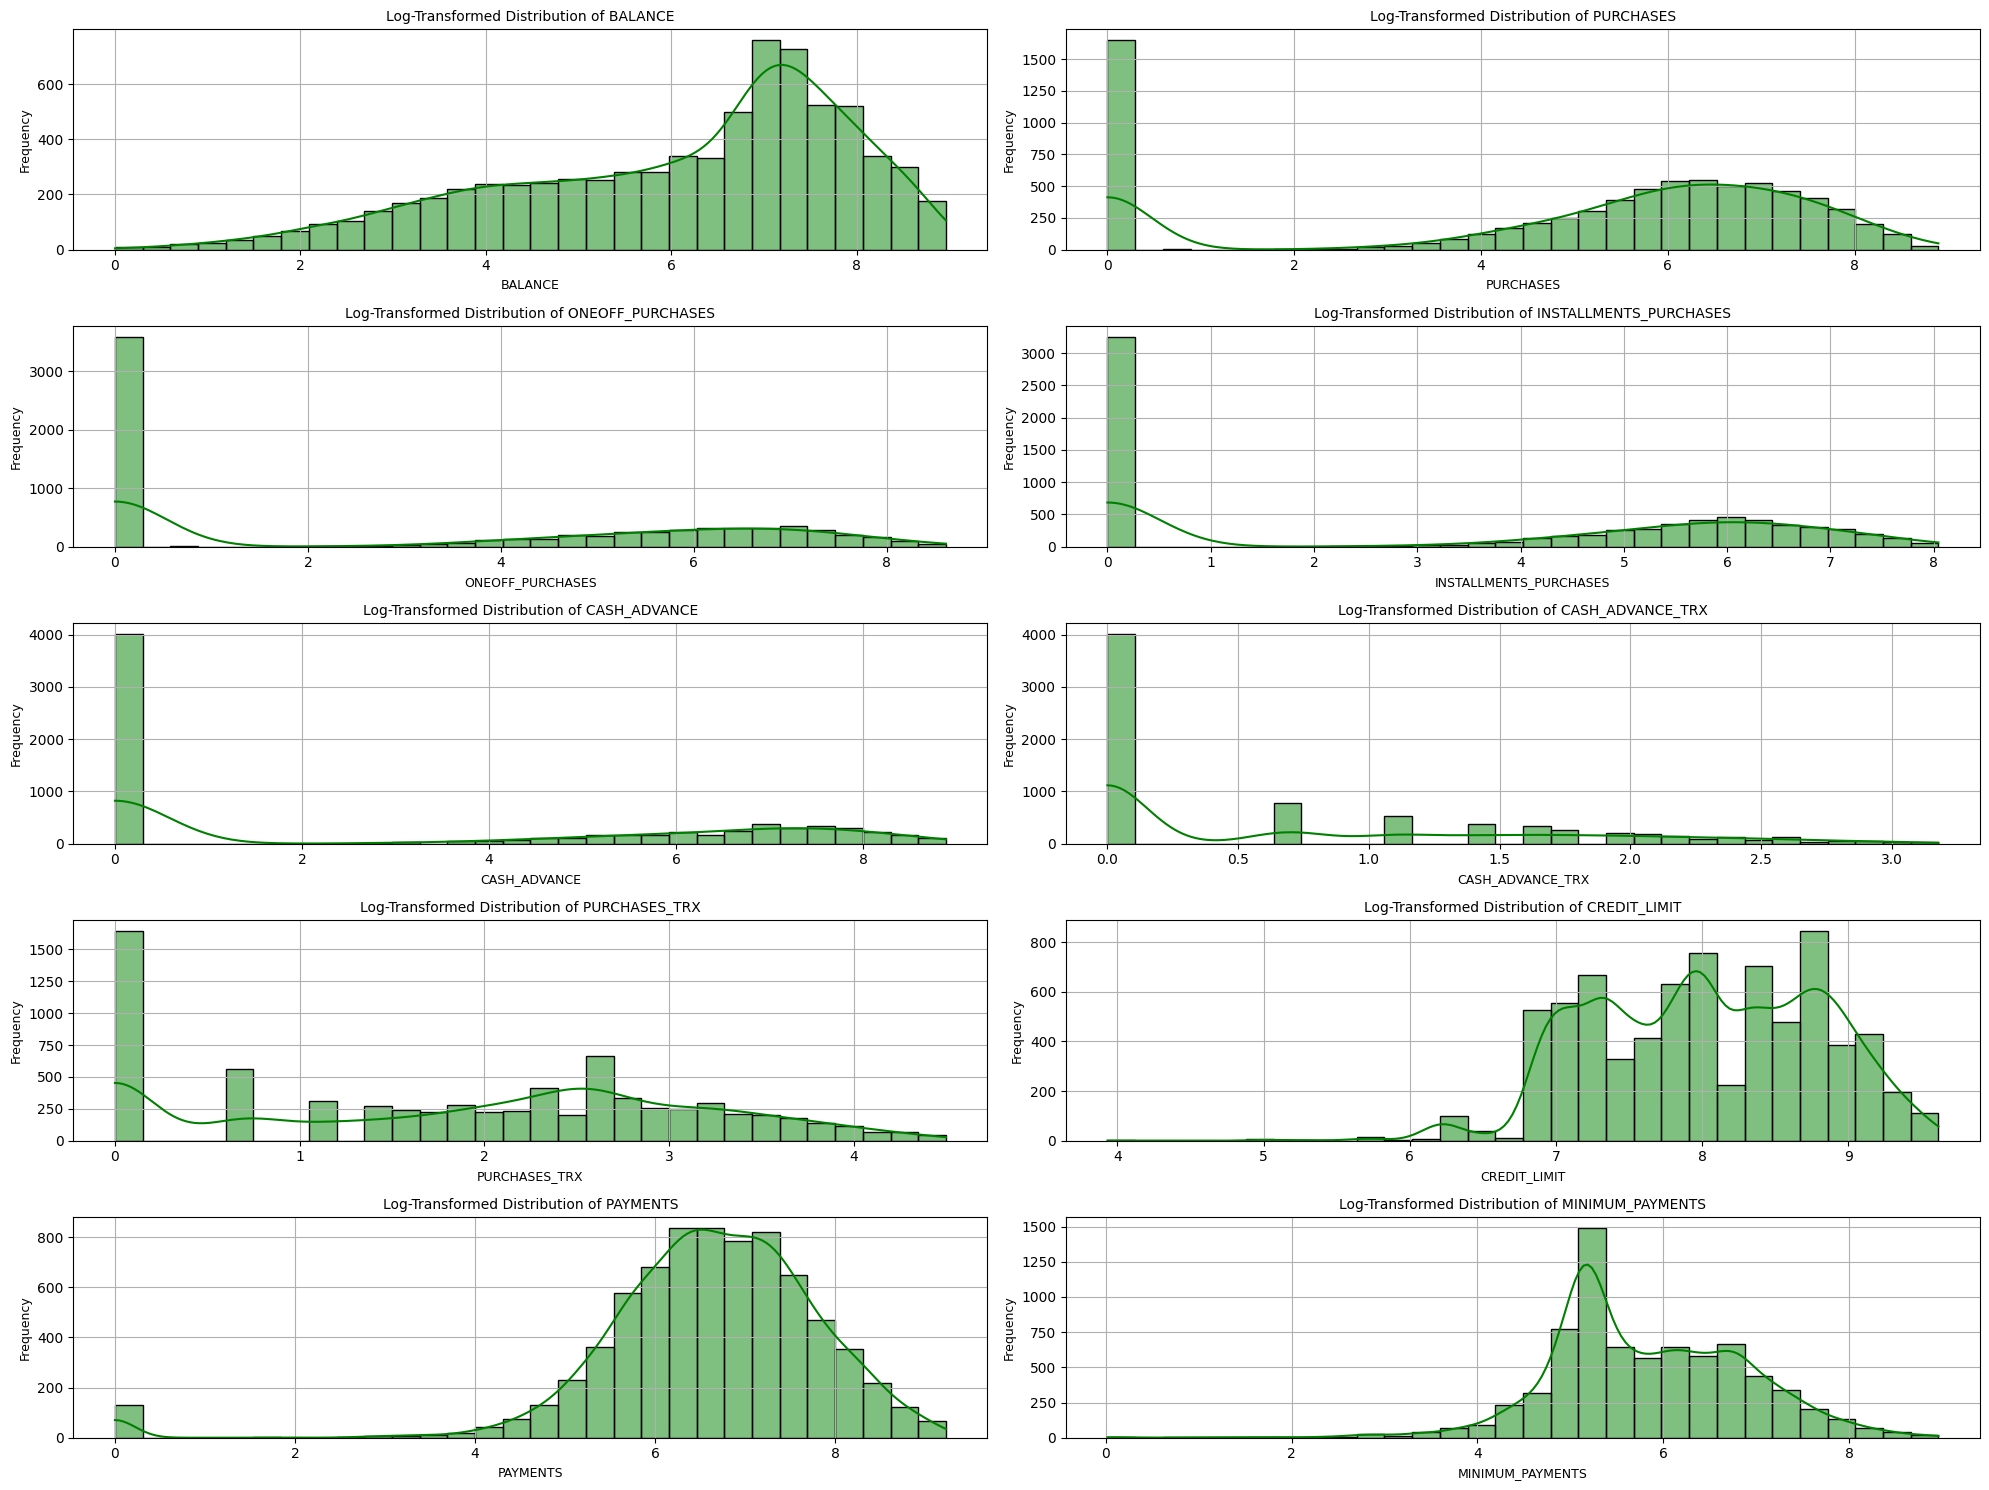

In [ ]:
import numpy as np

# Variables to log-transform
skewed_vars = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
               'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 
               'PAYMENTS', 'MINIMUM_PAYMENTS']

# log transformation 
df_no_outliers_log = df_no_outliers.copy() #creating copy incase something gets messed up
for var in skewed_vars:
    df_no_outliers_log[var] = np.log1p(df_no_outliers[var])  # log1p(data) 

# Visualizing the log-transformed distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
rows, cols = 5, 2  # Adjust subplot layout for 10 variables
for i, var in enumerate(skewed_vars, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_no_outliers_log[var], kde=True, bins=30, color='green')
    plt.title(f'Log-Transformed Distribution of {var}', fontsize=10)
    plt.xlabel(var, fontsize=9)
    plt.ylabel('Frequency', fontsize=9)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
df_no_outliers_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [27]:
df_no_outliers_log.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### ELBOW Method to determine number of clusters

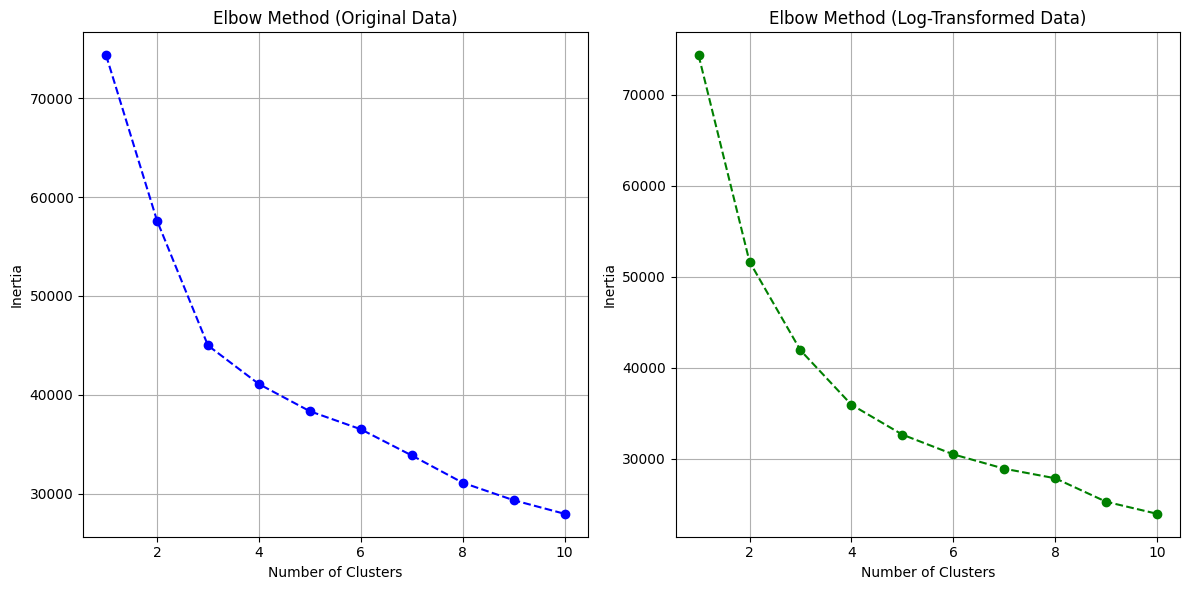

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the original data
scaler_original = StandardScaler()
data_original_scaled = scaler_original.fit_transform(df_no_outliers[skewed_vars])

# Standardize the log-transformed data
scaler_log = StandardScaler()
data_log_scaled = scaler_log.fit_transform(df_no_outliers_log[skewed_vars])

# Function to calculate inertia for different cluster numbers
def calculate_inertia(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# Calculate inertia for original and log-transformed data
max_clusters = 10
inertia_original = calculate_inertia(data_original_scaled, max_clusters)
inertia_log = calculate_inertia(data_log_scaled, max_clusters)

# Plot the elbow method
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), inertia_original, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method (Original Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()

# Log-Transformed Data
plt.subplot(1, 2, 2)
plt.plot(range(1, max_clusters + 1), inertia_log, marker='o', linestyle='--', color='green')
plt.title('Elbow Method (Log-Transformed Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()

plt.tight_layout()
plt.show()


- elbow method shows that 3 is likely the best number of clusters for both the original and log transformed data.

### Silhoutte Method to determine number of cluster

- silhoutte method indicates that 2 would be the ideal number of clusters since this is where the inertia is the highest

### K - Means for non standardized data

In [38]:
# Standardize the original data
scaler_original = StandardScaler()
data_original_scaled = scaler_original.fit_transform(df_no_outliers[skewed_vars])

# K-Means on original non standardized data
kmeans_original = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans_original.fit(data_original_scaled)

# Silhouette Score for original data
silhouette_original = silhouette_score(data_original_scaled, kmeans_original.labels_)
inertia_original = kmeans_original.inertia_
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Inertia (Original Data): {inertia_original}')

Silhouette Score (Original Data): 0.37291351620705115
Inertia (Original Data): 44984.17450444552


### K - Means for standardized data

In [34]:
# Standardize the log-transformed data
scaler_log = StandardScaler()
data_log_scaled = scaler_log.fit_transform(df_no_outliers_log[skewed_vars])

# K-Means on log-transformed data
kmeans_log = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans_log.fit(data_log_scaled)

# Silhouette Score for log-transformed data
silhouette_log = silhouette_score(data_log_scaled, kmeans_log.labels_)
inertia_log = kmeans_log.inertia_
print(f'Silhouette Score (Log-Transformed Data): {silhouette_log}')
print(f'Inertia (Log-Transformed Data): {inertia_log}')

Silhouette Score (Log-Transformed Data): 0.2622408134326134
Inertia (Log-Transformed Data): 41899.6934940204


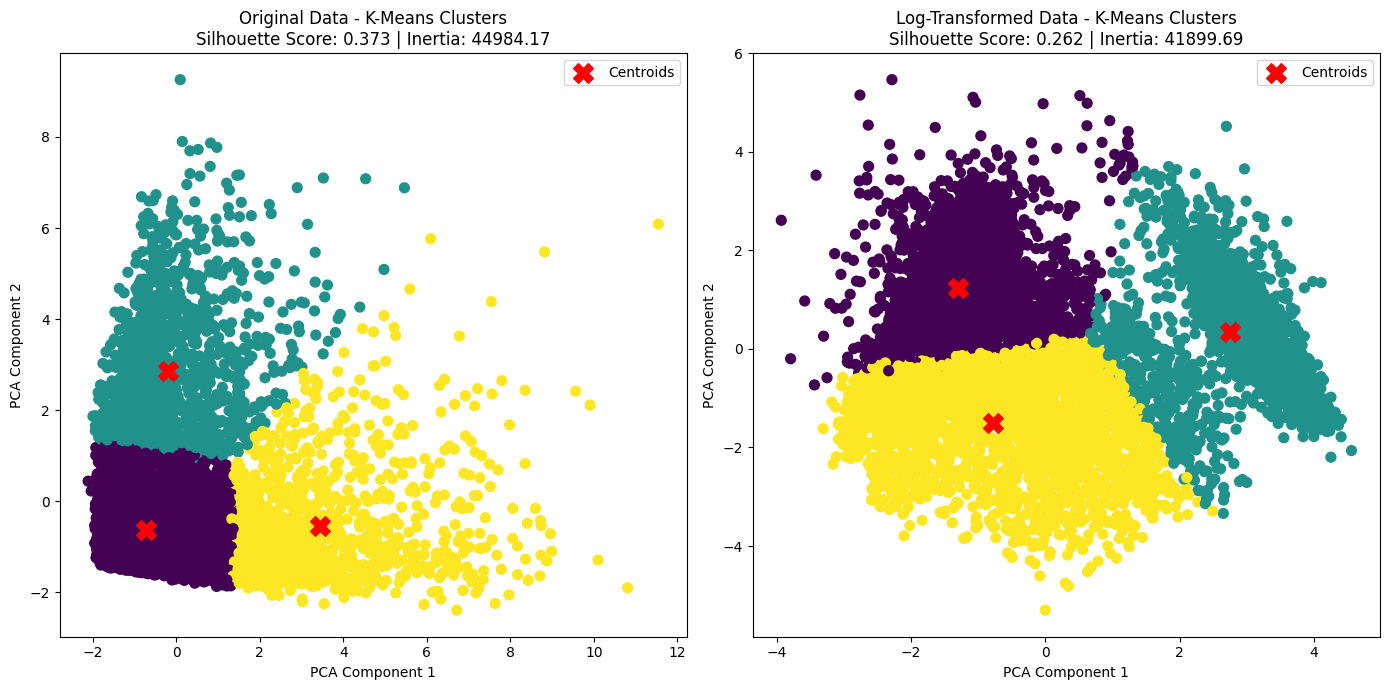

In [ ]:
# Silhouette Score and Inertia values
silhouette_original = 0.37291351620705115
inertia_original = 44984.17450444552
silhouette_log = 0.2622408134326134
inertia_log = 41899.6934940204

# PCA to reduce the original data to 2 components for visualization
pca_original = PCA(n_components=2)
data_original_pca = pca_original.fit_transform(data_original_scaled)

# PCA to reduce the log-transformed data to 2 components for visualization
pca_log = PCA(n_components=2)
data_log_pca = pca_log.fit_transform(data_log_scaled)

# Plotting the clusters for the original data
plt.figure(figsize=(14, 7))

# Original Data Clusters
plt.subplot(1, 2, 1)
plt.scatter(data_original_pca[:, 0], data_original_pca[:, 1], c=kmeans_original.labels_, cmap='viridis', s=50)
centroids_original = pca_original.transform(kmeans_original.cluster_centers_)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'Original Data - K-Means Clusters\nSilhouette Score: {silhouette_original:.3f} | Inertia: {inertia_original:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

# Log-Transformed Data Clusters
plt.subplot(1, 2, 2)
plt.scatter(data_log_pca[:, 0], data_log_pca[:, 1], c=kmeans_log.labels_, cmap='viridis', s=50)
centroids_log = pca_log.transform(kmeans_log.cluster_centers_)
plt.scatter(centroids_log[:, 0], centroids_log[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'Log-Transformed Data - K-Means Clusters\nSilhouette Score: {silhouette_log:.3f} | Inertia: {inertia_log:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.tight_layout()
plt.show()
